In [1]:
from sklearn import datasets
import pandas as pd

diabetes = datasets.load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feture_names)

df['target'] = diabetes.target

print(df[['age', 'sex', 'bmi' 'target']].head())


AttributeError: feture_names

In [6]:
# from sklearn.datasets import load_iris
# data = load_iris()

y = data.target
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

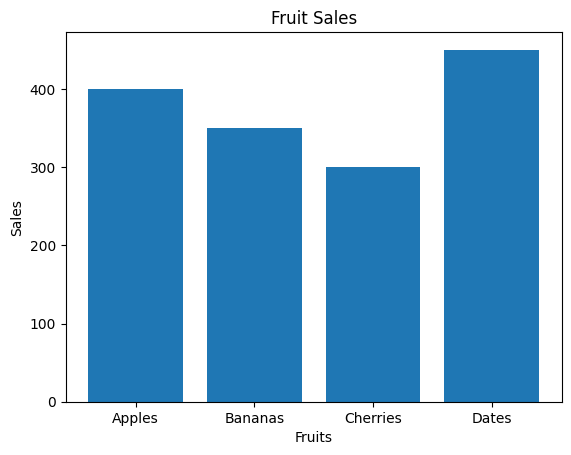

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fruits = ['Apples', 'Bananas', 'Cherries', 'Dates']
sales = [400, 350, 300, 450]

plt.bar(fruits, sales)
plt.title('Fruit Sales')
plt.xlabel('Fruits')
plt.ylabel('Sales')
plt.show()

In [8]:
import pandas as pd
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()

# Create DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


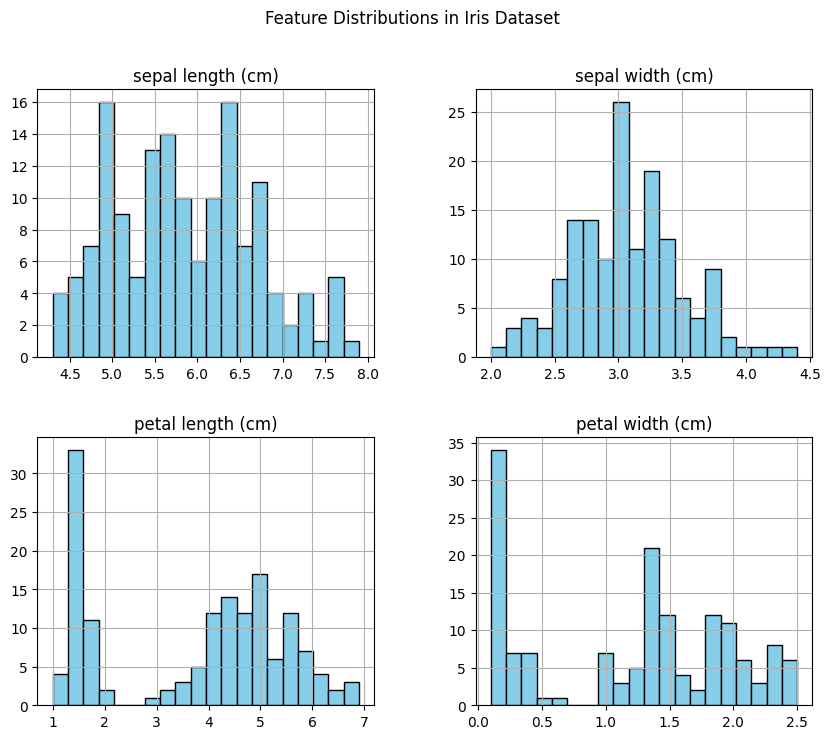

In [9]:
# plot

import matplotlib.pyplot as plt

df.hist(figsize=(10, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions in Iris Dataset")
plt.show()


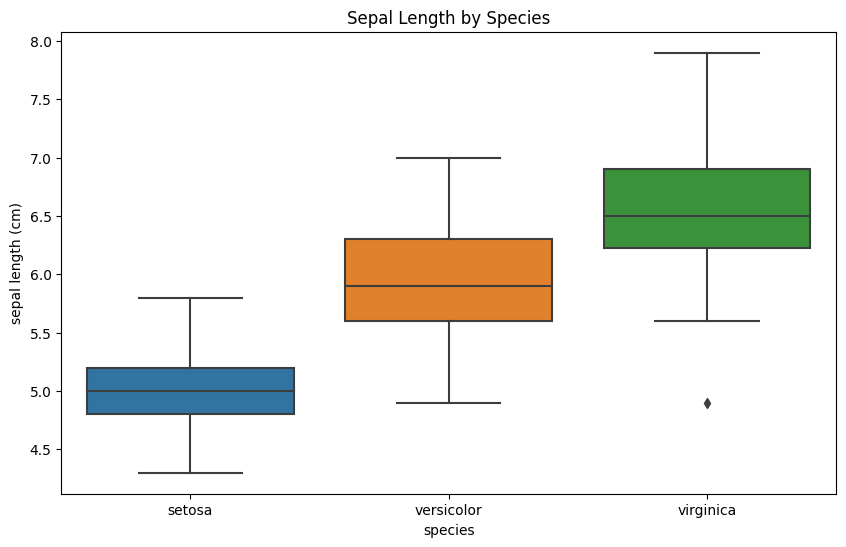

In [10]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal length (cm)', data=df)
plt.title('Sepal Length by Species')
plt.show()


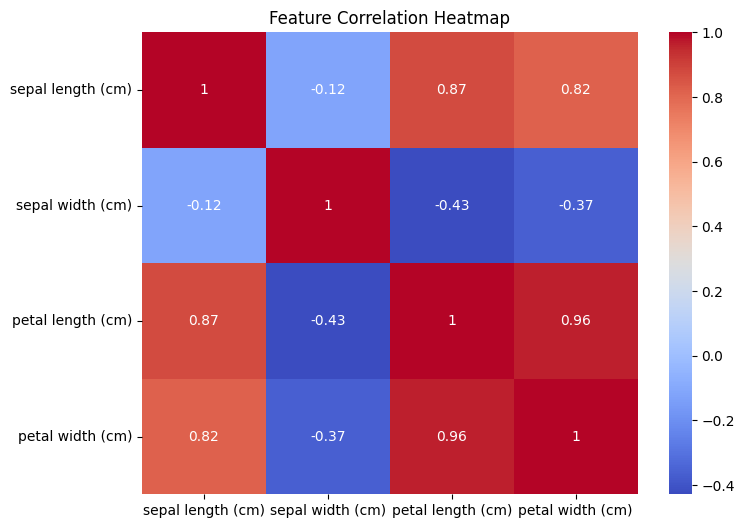

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


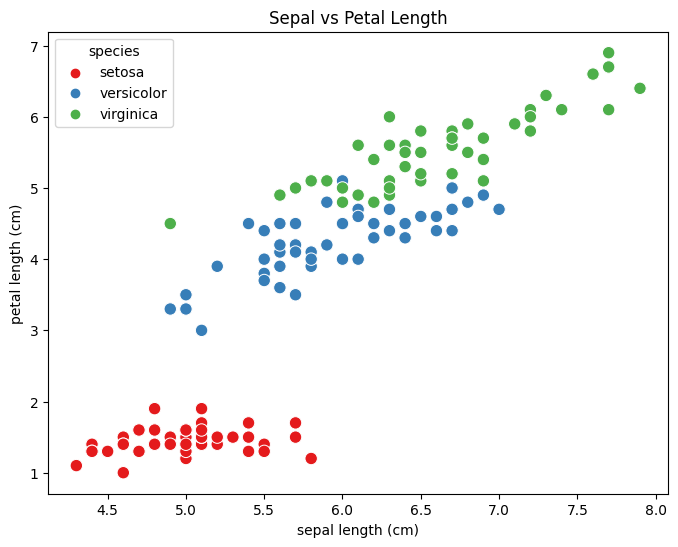

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='species', data=df, palette='Set1', s=80)
plt.title('Sepal vs Petal Length')
plt.show()


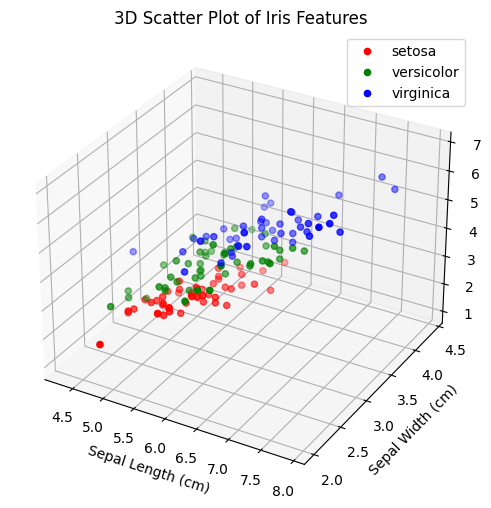

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
for species, color in zip(df['species'].unique(), ['r', 'g', 'b']):
    subset = df[df['species'] == species]
    ax.scatter(subset['sepal length (cm)'], subset['sepal width (cm)'], subset['petal length (cm)'], label=species, color=color)
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.legend()
plt.title("3D Scatter Plot of Iris Features")
plt.show()


In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Load dataset
iris = load_iris()

# Create DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Features and target
X = df.iloc[:, :-1]   # all columns except target
y = df['target']       # target column


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [5]:
# Initialize model
model = LogisticRegression(max_iter=200)

# Train (fit) the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)




In [6]:
accuracy = accuracy_score(y_test, y_pred)
print("✅ Model Accuracy:", accuracy)




✅ Model Accuracy: 0.9666666666666667


In [7]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))



Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



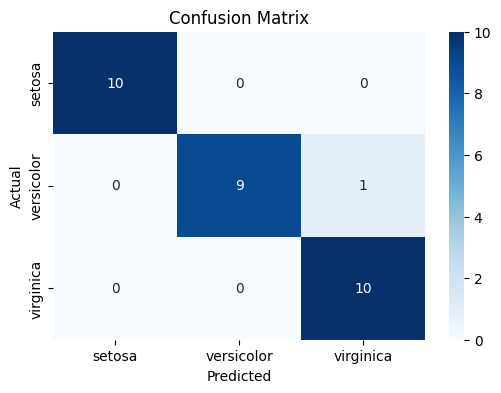

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
